---

### 1.Importing libraries

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as shc


----

### 2. Dataframe preprocessing

In [73]:
#load csv into dataframe
df = pd.read_csv("tmdb_5000_movies.csv")

In [74]:
#see the column information in the
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [75]:
#see the first 5 rows, notice that genres row and keywords row are dictionaries inside a list (next line of code)
#in fact it is in json format embedded and will require processing to extract just the genre names
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [76]:
# we see that the json format is a list and inside the list we have dictionaries
for i in df["genres"].head():
    print(i)

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]
[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]
[{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]
[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]


In [77]:
# we use the json loads to parse a json string into a python dictionary
# we initiate a loop with an inner loop, where i represents the value of genres column for a specific row
# inside the inner loop we iterate with j through the list of dictionairies, and i[j] gives us a single dictionary from the list and i[j]("name") retrieves the value associated with the key name from the dictionary.
# we then append this value to list 1
# after we process all dictionaries for a row we update the genres colum for that row using df.loc & convert it to a string
df['genres'] = df['genres'].apply(json.loads)
for index,i in zip(df.index,df['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    df.loc[index,'genres'] = str(list1)

In [78]:
# we preview for the first ten rows of the genres column the value output
for i in df["genres"].head(10):
    print(i)

['Action', 'Adventure', 'Fantasy', 'Science Fiction']
['Adventure', 'Fantasy', 'Action']
['Action', 'Adventure', 'Crime']
['Action', 'Crime', 'Drama', 'Thriller']
['Action', 'Adventure', 'Science Fiction']
['Fantasy', 'Action', 'Adventure']
['Animation', 'Family']
['Action', 'Adventure', 'Science Fiction']
['Adventure', 'Fantasy', 'Family']
['Action', 'Adventure', 'Fantasy']


In [79]:
# we preview the type which is a string
for i in df["genres"].head(4):
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [80]:
# We remove the square brackets from the beginning and end of each string in the "genres" column. 
# We remove any extra spaces from the strings & any single quotes
# We then split each string into a listo of individual genre names using the comma as the delimiter
# The purpose is to be able to have an output where for each row the genres are in a list format to be used for MultilabelBinarizer
df['genres'] = df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['genres'] = df['genres'].str.split(',')

In [81]:
# previous of the list format
df["genres"]

0       [Action, Adventure, Fantasy, ScienceFiction]
1                       [Adventure, Fantasy, Action]
2                         [Action, Adventure, Crime]
3                   [Action, Crime, Drama, Thriller]
4                [Action, Adventure, ScienceFiction]
                            ...                     
4798                       [Action, Crime, Thriller]
4799                               [Comedy, Romance]
4800               [Comedy, Drama, Romance, TVMovie]
4801                                              []
4802                                   [Documentary]
Name: genres, Length: 4803, dtype: object

In [82]:
#confirming the list format
for i in df["genres"].head(4):
    print(type(i))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


----

### 3. Creating dummy variables

In [83]:
# create an instance of MultiLabelBinarizer, used to convert the list into a format where each genre is its own column and has a value of either 1 or 0 (1 means the movie has this genre, 0)
mlb = MultiLabelBinarizer()

In [84]:
# we apply the MultiLabelBinarizer to the genres column and create a new dataframe with the output.
# For each column we use the unique names of the genres & for index we use the same index as the original dataframe
one_hot_df =pd.DataFrame(mlb.fit_transform(df["genres"]),columns=mlb.classes_,index=df.index)



In [85]:
#we notice before the column action we have another column which seems to be empty
one_hot_df

,,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western
0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4799,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4800,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4801,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
#we use the below command to get the column names and identify columns that are to be removed. In this case column ''
one_hot_df.columns

Index(['', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'ScienceFiction', 'TVMovie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [87]:
# use the drop command to remove it
one_hot_df.drop("",axis=1,inplace=True)

In [88]:
# we concatenate the original df with the multilabeled df
new_df = pd.concat([df,one_hot_df],axis=1)

In [89]:
#confirm the result of the new dataframe, review which columns we want to drop
new_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [90]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [91]:
#see the results of value counts
new_df["status"].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [92]:
# we decide to drop the following columns; reminder we now have multi labelled genres so we can drop the original 
new_df.drop(["homepage","genres","id","keywords","original_title","overview",
             "production_countries","spoken_languages","tagline","title","production_companies","status"],axis=1,inplace=True)

In [93]:
#we transform the original language into dummy variables ands save it to a dataframe
original_language = pd.get_dummies(df["original_language"],drop_first=True)

In [94]:
# we confirm the result of the dataframe
original_language.head()

,ar,cn,cs,da,de,el,en,es,fa,fr,he,hi,hu,id,is,it,ja,ko,ky,nb,nl,no,pl,ps,pt,ro,ru,sl,sv,ta,te,th,tr,vi,xx,zh
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
# we concatenate the dummy variables created into a new df
new_df = pd.concat([new_df,original_language],axis=1)

In [96]:
# we drop the original language column since we have transformed it into dummy variables
new_df.drop("original_language",axis=1,inplace=True)

In [97]:
# check our new dataframe rows and columns 
new_df.shape

(4803, 63)

In [98]:
#check the column names
new_df.columns

Index(['budget', 'popularity', 'release_date', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'ScienceFiction', 'TVMovie', 'Thriller', 'War', 'Western', 'ar', 'cn',
       'cs', 'da', 'de', 'el', 'en', 'es', 'fa', 'fr', 'he', 'hi', 'hu', 'id',
       'is', 'it', 'ja', 'ko', 'ky', 'nb', 'nl', 'no', 'pl', 'ps', 'pt', 'ro',
       'ru', 'sl', 'sv', 'ta', 'te', 'th', 'tr', 'vi', 'xx', 'zh'],
      dtype='object')

----

### 4. NA handling

In [99]:
# we have one row with na release date so we drop it
new_df.dropna(subset = ["release_date"],inplace=True)

In [100]:
# we have two rows with NA so we fill them in with the median value to avoid outlier effect verus dropping them
# since we have less than 5k entries the throught process is to salvage these rows instead of dropping them
new_df.fillna(df["runtime"].median(),inplace=True)

In [101]:
#no other NA values are present
# note release date is an object vs date
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          4802 non-null   int64  
 1   popularity      4802 non-null   float64
 2   release_date    4802 non-null   object 
 3   revenue         4802 non-null   int64  
 4   runtime         4802 non-null   float64
 5   vote_average    4802 non-null   float64
 6   vote_count      4802 non-null   int64  
 7   Action          4802 non-null   int32  
 8   Adventure       4802 non-null   int32  
 9   Animation       4802 non-null   int32  
 10  Comedy          4802 non-null   int32  
 11  Crime           4802 non-null   int32  
 12  Documentary     4802 non-null   int32  
 13  Drama           4802 non-null   int32  
 14  Family          4802 non-null   int32  
 15  Fantasy         4802 non-null   int32  
 16  Foreign         4802 non-null   int32  
 17  History         4802 non-null   i

In [102]:
pd.set_option('display.max_columns', 500)
# to display a max of 500 columns

In [103]:
new_df.head()

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western,ar,cn,cs,da,de,el,en,es,fa,fr,he,hi,hu,id,is,it,ja,ko,ky,nb,nl,no,pl,ps,pt,ro,ru,sl,sv,ta,te,th,tr,vi,xx,zh
0,237000000,150.437577,2009-12-10,2787965087,162.0,7.2,11800,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,300000000,139.082615,2007-05-19,961000000,169.0,6.9,4500,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,245000000,107.376788,2015-10-26,880674609,148.0,6.3,4466,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,250000000,112.312950,2012-07-16,1084939099,165.0,7.6,9106,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,260000000,43.926995,2012-03-07,284139100,132.0,6.1,2124,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


----

### 5. Datetime object to date

In [104]:
# convert from object to date
new_df["release_date"] = pd.to_datetime(new_df["release_date"])

In [105]:
# get the month from each column
new_df["release_month"] = new_df["release_date"].dt.month

In [106]:
# drop release date as no other info here is deemed necessary to retain
new_df.drop("release_date",axis=1,inplace=True)

---

### 6. Correlations & data distribution

<AxesSubplot: >

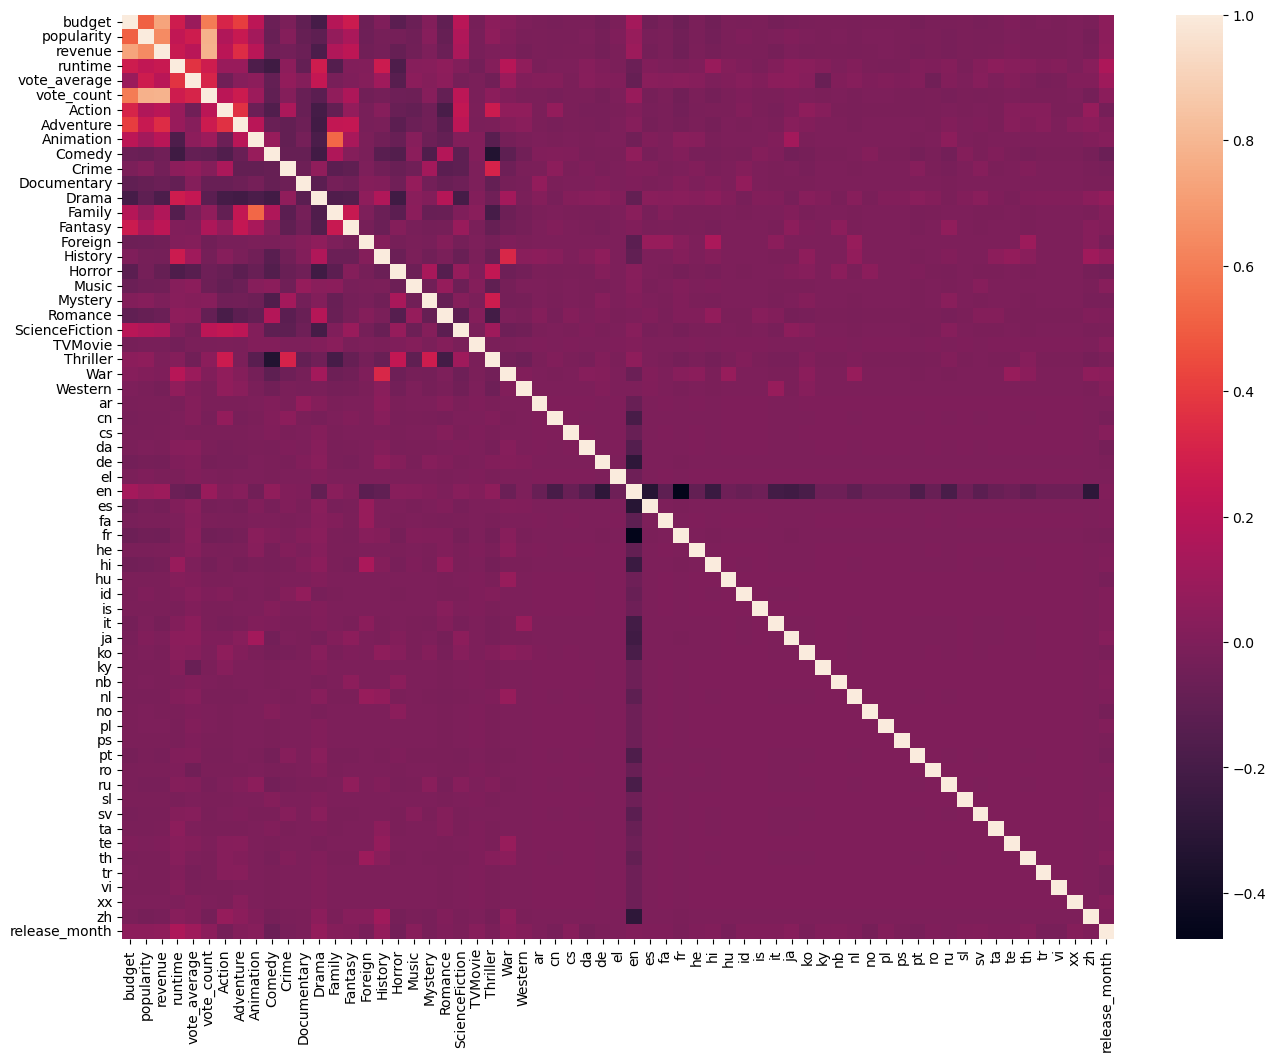

In [107]:
# create a correlation heatmap using plt.figure to adjust the size and sns heatmap to visualize the correlation matrix
plt.figure(figsize=(16,12))
sns.heatmap(new_df.corr())

In [108]:
#view the correlations as a table
# revenue and budget have a high correlation which intuitively may make sense more spending = more resources for a better movie
# popularity and revenue have a high correlation, more people watch a movie the higher its revenue
new_df.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western,ar,cn,cs,da,de,el,en,es,fa,fr,he,hi,hu,id,is,it,ja,ko,ky,nb,nl,no,pl,ps,pt,ro,ru,sl,sv,ta,te,th,tr,vi,xx,zh,release_month
budget,1.000000,0.505364,0.730806,0.269811,0.092644,0.593148,0.310219,0.406209,0.207959,-0.068633,-0.012146,-0.099260,-0.196895,0.184034,0.263739,-0.058881,0.004330,-0.123760,-0.064609,0.011624,-0.102655,0.198388,-0.027990,0.043049,0.026906,-0.006384,-0.014563,-0.022524,-0.014563,-0.018117,-0.037736,-0.010296,0.128891,-0.046672,-0.020426,-0.061440,-0.017428,-0.042310,-0.010296,-0.014037,-0.010296,-0.034637,-0.020954,-0.017369,-0.010296,-0.009056,-0.015370,-0.010013,-0.009531,-0.010280,-0.029709,-0.014349,-0.017743,-0.010296,-0.019069,-0.014563,0.003881,-0.014870,-0.006752,-0.009836,-0.006043,-0.012974,0.050281
popularity,0.505364,1.000000,0.644700,0.225398,0.273990,0.778114,0.166947,0.247866,0.123190,-0.076988,0.017554,-0.084467,-0.112325,0.068876,0.145651,-0.055234,-0.026342,-0.035022,-0.052821,0.027149,-0.083200,0.166444,-0.019398,0.055971,0.012603,-0.013508,-0.010762,-0.017094,-0.012967,-0.004603,-0.026815,0.003339,0.083775,-0.021023,-0.014369,-0.042806,-0.012678,-0.036654,-0.008887,0.001982,-0.009018,-0.006252,0.007573,-0.003024,-0.009716,-0.003862,-0.015181,-0.004668,-0.003734,-0.009095,-0.013875,-0.010713,-0.020978,-0.009724,-0.014358,-0.013556,-0.002378,-0.011212,-0.009087,-0.009719,-0.006786,-0.029546,0.046648
revenue,0.730806,0.644700,1.000000,0.251209,0.197153,0.781475,0.203543,0.344369,0.199317,-0.050452,-0.040771,-0.068107,-0.177352,0.170037,0.212262,-0.042475,-0.031439,-0.082793,-0.041573,-0.006826,-0.065422,0.152590,-0.020639,-0.004552,0.002028,-0.029163,-0.010313,-0.014918,-0.010313,-0.012289,-0.031544,-0.007282,0.100748,-0.032000,-0.014548,-0.052142,-0.012063,-0.028961,-0.007292,-0.010028,-0.007292,-0.026314,-0.005769,-0.016748,-0.007292,-0.006923,-0.013403,-0.007116,-0.006343,-0.007292,-0.020822,-0.010239,-0.021410,-0.007292,-0.016311,-0.010313,0.001571,-0.010784,-0.007292,-0.007235,-0.002394,-0.018720,0.055232
runtime,0.269811,0.225398,0.251209,1.000000,0.370979,0.272057,0.090961,0.087283,-0.170325,-0.227629,0.050567,-0.088228,0.272309,-0.147176,0.005268,0.013932,0.266793,-0.168948,0.026872,0.033405,0.052648,0.009137,-0.038526,0.017271,0.194395,0.061110,-0.013482,-0.004763,-0.002169,0.024618,0.002938,-0.008252,-0.069301,0.007979,-0.005948,-0.009611,0.001223,0.088681,0.021182,0.000999,-0.014011,0.016174,0.040000,0.035756,0.017983,-0.002493,0.014534,-0.010172,-0.017210,-0.015291,0.005749,0.001451,0.020885,-0.015291,0.017325,0.050322,0.033340,0.025980,0.009664,0.017983,-0.004413,0.030598,0.157606
vote_average,0.092644,0.273990,0.197153,0.370979,1.000000,0.313263,-0.049063,0.023660,0.047116,-0.092795,0.062445,0.018602,0.237234,-0.018524,0.000851,0.018393,0.108741,-0.136408,0.044061,0.021226,0.045878,-0.026105,-0.014776,-0.041588,0.091567,0.009361,0.020673,0.017080,-0.007598,0.033197,0.014674,0.009771,-0.086184,0.038908,0.031059,0.034359,0.027420,-0.004386,0.004925,0.022386,0.009771,0.042444,0.046424,0.023299,-0.073816,0.007348,0.026212,0.000079,0.012193,0.002502,0.010746,-0.041865,0.010502,-0.001132,0.026193,-0.004171,0.017039,-0.002661,-0.021726,-0.013246,0.012193,0.013037,0.108011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tr,-0.006752,-0.009087,-0.007292,0.009664,-0.021726,-0.007989,0.025660,0.032524,-0.003266,-0.010791,-0.005942,-0.002210,0.015072,-0.004991,-0.004491,-0.001219,-0.002985,-0.005024,-0.002889,-0.004034,-0.006903,-0.005110,-0.000590,-0.008673,-0.002538,-0.001902,-0.000295,-0.000722,-0.000295,-0.000551,-0.001085,-0.000208,-0.056108,-0.001182,-0.000417,

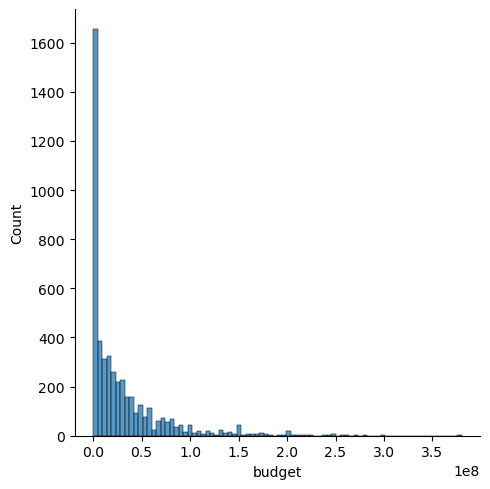

In [115]:
sns.displot(df["budget"])
#sns.histplot(df["budget"])


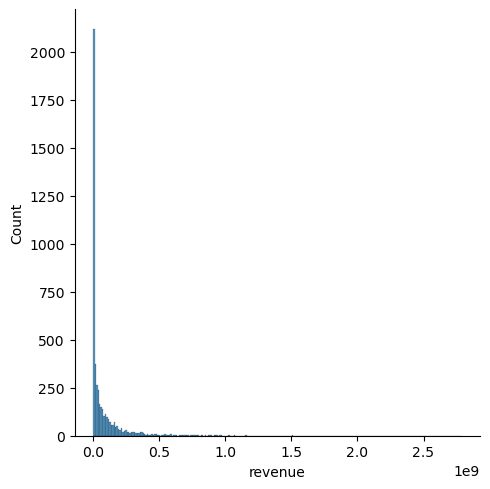

In [116]:
sns.displot(df["revenue"])

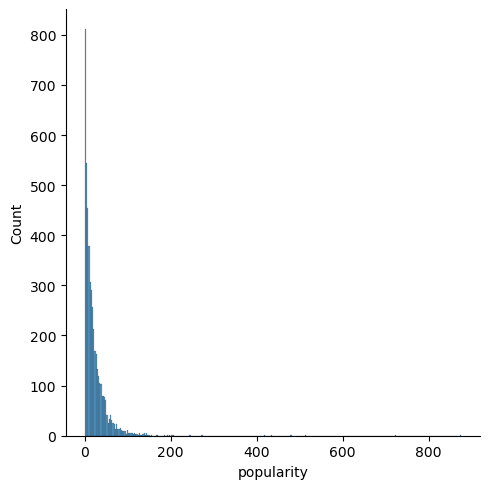

In [117]:
sns.displot(df["popularity"])

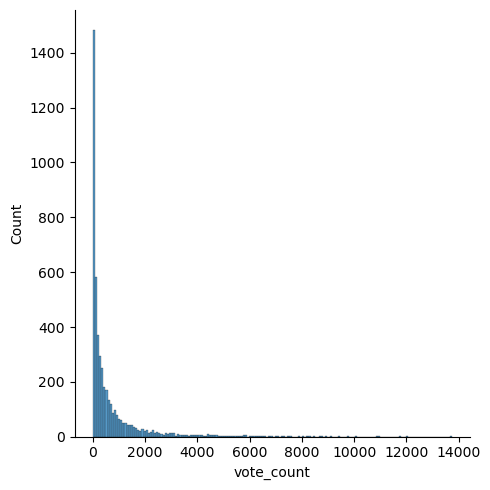

In [118]:
sns.displot(df["vote_count"])

----

#### 7. Scaling the data

In [51]:
# we will use a robust scaler in order to not be affected by outliers for movies which may have huge budgets or huge vote counts
# from the above graphs we can see that the columns do not appear to have a normal distribution

In [120]:
#initiate the scaler
robust = RobustScaler()

In [121]:
#fit transform into a new dataframe
new_df2 = pd.DataFrame(robust.fit_transform(new_df),columns = new_df.columns)

In [122]:
new_df2

,budget,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western,ar,cn,cs,da,de,el,en,es,fa,fr,he,hi,hu,id,is,it,ja,ko,ky,nb,nl,no,pl,ps,pt,ro,ru,sl,sv,ta,te,th,tr,vi,xx,zh,release_month
0,5.663265,5.811961,29.797827,2.484211,0.833333,16.931918,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333
1,7.270408,5.332045,10.135958,2.778947,0.583333,6.243777,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333
2,5.867347,3.992000,9.271493,1.894737,0.083333,6.193997,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
3,5.994898,4.200627,11.469795,2.610526,1.166667,12.987555,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,6.250000,1.310300,2.851554,1.221053,-0.083333,2.765007,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,-0.377041,0.056840,-0.184397,-0.926316,0.333333,0.003660,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
4798,-0.382423,-0.519114,-0.206362,-0.757895,-0.250000,-0.337482,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333
4799,-0.382653,-0.485221,-0.206362,0.715789,0.666667,-0.336018,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
4800,-0.382653,-0.510050,-0.206362,-0.210526,-0.416667,-0.334553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333


---

### 8. Using PCA

In [123]:
# we will use pca for dimensionality reduction creating 5 columns that combine our current columns
pca = PCA(n_components=5)


In [124]:
#we fit the pca into our new dataframe
pca.fit(new_df2)

PCA(n_components=5)

In [125]:
# we see the sum of variance explained by all components in the data
pca.explained_variance_ratio_.sum()

0.8117788414100637

In [126]:
#we create a new dataframe where we have fit and transformed the original data using pca
pca_df2 = pd.DataFrame(pca.fit_transform(new_df2))

In [156]:
pca.explained_variance_ratio_.sum()

0.8117788414100641

---

### 9. Hierarchical clustering, Inertia and Silhouette Score

In [129]:
# Perform hierarchical clustering on your reduced data, this will allow us to see the ideal number of clusters
Z = linkage(pca_df2, method='ward')

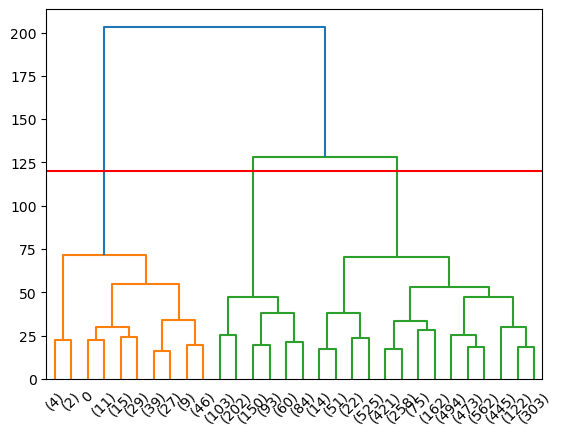

In [133]:
# applying a line at y value =120 we can see three distinct clusters forming with the maximum distance between them and their further subsections
dendrogram(Z, truncate_mode='lastp', p=30)
plt.axhline(y = 120, color = 'r', linestyle = '-')
plt.show()

In [ ]:
#we can also use the kmeans elbow method and silhouette scores to attempt to find the perfect clusters

In [86]:
#we create an empty list both for the inertias and the silhouettes. 
#Inertia will count the intra cluster distance while the silhouette will count a combination of both intra and inter cluster distance
# we initiate a loop that will have values of k being 2-7
# we fit the kmeans algorithm with number of clusters being the iteration value
# we append the inertia and the silhouette score to the list
inertias = []
silhouettes = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_df2)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(pca_df2, kmeans.labels_))

Text(0.5, 1.0, 'Silhouette Method')

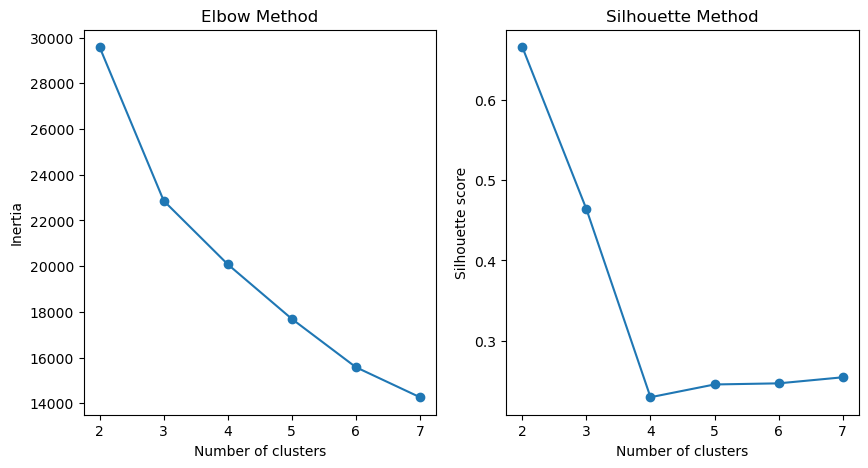

In [139]:
#we plot the result diving the space into two subsplots, one for the elbow method and the other for the silhouette method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(range(2, 8), inertias, marker='o')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')

ax2.plot(range(2, 8), silhouettes, marker='o')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette score')
ax2.set_title('Silhouette Method')

In [154]:
# we can see that for the elbow method the elbow appears to begin at three clusters,
# we can see that for the silhouette the ideal number of clusters is 2, and the next optimal is 3
# since from the hierarchical clustering we also have the cutoff point at three, and these methods also more or less confirm it we will proceed with three

---

### 10. Final cluster and aggregated metrics per cluster(ROI,majority genre representation per cluster &moreabs)

In [134]:
# we create a variable with the number of clusters and fit it with the k means algorithm
# we then create a new dataframe which will contain a new column that is the prediction of the algo for that cluster (the value will be either 0,1,2)
number_of_clusters = 3

km = KMeans(n_clusters = number_of_clusters,random_state = 22)
km.fit(pca_df2)

result = pca_df2.copy()
result["cluster"] = km.predict(pca_df2)

In [135]:
result["cluster"].value_counts()
# we see the size of each cluster

0    3767
2     874
1     161
Name: cluster, dtype: int64

In [137]:
# we add the column with the results to our original dataframe
new_df["result"] = result["cluster"]

In [138]:
new_df

,budget,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western,ar,cn,cs,da,de,el,en,es,fa,fr,he,hi,hu,id,is,it,ja,ko,ky,nb,nl,no,pl,ps,pt,ro,ru,sl,sv,ta,te,th,tr,vi,xx,zh,release_month,result
0,237000000,150.437577,2787965087,162.0,7.2,11800,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,1.0
1,300000000,139.082615,961000000,169.0,6.9,4500,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1.0
2,245000000,107.376788,880674609,148.0,6.3,4466,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0
3,250000000,112.312950,1084939099,165.0,7.6,9106,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1.0
4,260000000,43.926995,284139100,132.0,6.1,2124,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,14.269792,2040920,81.0,6.6,238,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0.0
4799,9000,0.642552,0,85.0,5.9,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0.0
4800,0,1.444476,0,120.0,7.0,6,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0.0
4801,0,0.857008,0,98.0,5.7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0.0


In [139]:
# we groupby the cluster and aggregate column metrics
new_df.groupby("result").agg({
    "runtime": np.mean,
    "vote_average": np.mean,
    "vote_count":np.mean,
    "budget":np.mean,
    "revenue":np.mean,
    "release_month": pd.Series.mode,
    "popularity":np.mean
                               })

,runtime,vote_average,vote_count,budget,revenue,release_month,popularity
result,,,,,,,
0.0,103.848911,5.930828,239.686405,1.631461e+07,2.616286e+07,9,11.586709
1.0,127.919255,7.077640,5493.608696,1.384699e+08,7.210830e+08,6,114.496050
2.0,116.175057,6.612586,1748.250572,6.380876e+07,2.064922e+08,12,47.089452


In [140]:
#we save tge above into variable agg
agg = new_df.groupby("result").agg({
    "runtime": np.mean,
    "vote_average": np.mean,
    "vote_count":np.mean,
    "budget":np.mean,
    "revenue":np.mean,
    "release_month": pd.Series.mode,
    "popularity":np.mean
                               })

In [141]:
#we keep only budget and revenue and save it to a new variable
new_agg = agg[["budget","revenue"]]

In [142]:
# we create a new columnf for the ROI
new_agg["ROI in %"]=round((new_agg["revenue"] - new_agg["budget"])/(new_agg["budget"])*100,0)

C:\Users\nicolas.margos\AppData\Local\Temp\ipykernel_24680\339332241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_agg["ROI in %"]=round((new_agg["revenue"] - new_agg["budget"])/(new_agg["budget"])*100,0)


In [143]:
# we visualize the budget, the rev and the ROI per cluster
new_agg

,budget,revenue,ROI in %
result,,,
0.0,1.631461e+07,2.616286e+07,60.0
1.0,1.384699e+08,7.210830e+08,421.0
2.0,6.380876e+07,2.064922e+08,224.0


<AxesSubplot: xlabel='result'>

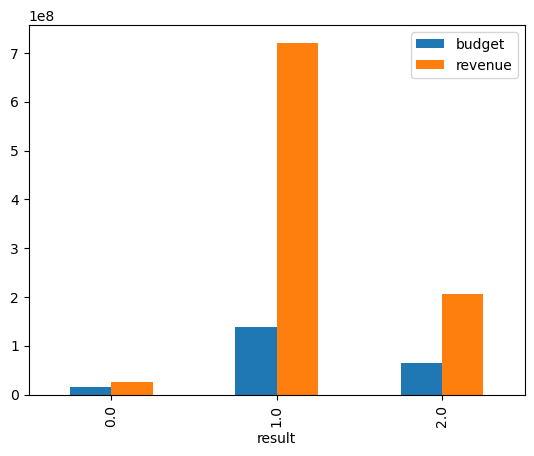

In [144]:
#we visualize the above graph for budget and revenue
new_agg[["budget","revenue"]].plot.bar()

In [145]:
new_df.groupby("result").agg({
    "runtime": np.mean,
    "vote_average": np.mean,
    "vote_count":np.mean,
    "budget":np.mean,
    "revenue":np.mean,
    "release_month": pd.Series.mode,
    "popularity":np.mean
                               })

,runtime,vote_average,vote_count,budget,revenue,release_month,popularity
result,,,,,,,
0.0,103.848911,5.930828,239.686405,1.631461e+07,2.616286e+07,9,11.586709
1.0,127.919255,7.077640,5493.608696,1.384699e+08,7.210830e+08,6,114.496050
2.0,116.175057,6.612586,1748.250572,6.380876e+07,2.064922e+08,12,47.089452


In [146]:
new_df["result"].value_counts()

0.0    3766
2.0     874
1.0     161
Name: result, dtype: int64

In [147]:
new_df.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'ScienceFiction', 'TVMovie',
       'Thriller', 'War', 'Western', 'ar', 'cn', 'cs', 'da', 'de', 'el', 'en',
       'es', 'fa', 'fr', 'he', 'hi', 'hu', 'id', 'is', 'it', 'ja', 'ko', 'ky',
       'nb', 'nl', 'no', 'pl', 'ps', 'pt', 'ro', 'ru', 'sl', 'sv', 'ta', 'te',
       'th', 'tr', 'vi', 'xx', 'zh', 'release_month', 'result'],
      dtype='object')

In [148]:
#we group by cluster to see the sum of movie genres that belong in each cluster
new_df.groupby("result")['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'ScienceFiction', 'TVMovie',
       'Thriller', 'War', 'Western'].sum() 

C:\Users\nicolas.margos\AppData\Local\Temp\ipykernel_24680\4184419309.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_df.groupby("result")['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western
result,,,,,,,,,,,,,,,,,,,,
0.0,740,436,116,1423,537,108,1931,343,232,34,159,452,165,263,755,326,8,960,103,69
1.0,89,110,32,32,12,0,33,46,50,0,2,2,0,10,7,58,0,31,5,2
2.0,325,244,86,267,147,1,333,124,142,0,36,65,20,75,132,151,0,283,36,11


In [150]:
# we turn these into percentages per genre to see for example the representation of Action per cluster
movie_percents = new_df.groupby("result")['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'ScienceFiction', 'TVMovie',
       'Thriller', 'War', 'Western'].sum() / new_df.groupby("result")['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'ScienceFiction', 'TVMovie',
       'Thriller', 'War', 'Western'].count()

C:\Users\nicolas.margos\AppData\Local\Temp\ipykernel_24680\1807596194.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  movie_percents = new_df.groupby("result")['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
C:\Users\nicolas.margos\AppData\Local\Temp\ipykernel_24680\1807596194.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  'Thriller', 'War', 'Western'].sum() / new_df.groupby("result")['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',


In [151]:
# we have the results for each table
movie_percents

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western
result,,,,,,,,,,,,,,,,,,,,
0.0,0.196495,0.115773,0.030802,0.377854,0.142592,0.028678,0.512746,0.091078,0.061604,0.009028,0.042220,0.120021,0.043813,0.069835,0.200478,0.086564,0.002124,0.254912,0.027350,0.018322
1.0,0.552795,0.683230,0.198758,0.198758,0.074534,0.000000,0.204969,0.285714,0.310559,0.000000,0.012422,0.012422,0.000000,0.062112,0.043478,0.360248,0.000000,0.192547,0.031056,0.012422
2.0,0.371854,0.279176,0.098398,0.305492,0.168192,0.001144,0.381007,0.141876,0.162471,0.000000,0.041190,0.074371,0.022883,0.085812,0.151030,0.172769,0.000000,0.323799,0.041190,0.012586


In [152]:
# we use the following command to find which genre has the highest representation in each cluster
movie_percents.idxmax().sort_values(ascending=False)

Mystery           2.0
War               2.0
Crime             2.0
Thriller          2.0
Action            1.0
Animation         1.0
Family            1.0
Fantasy           1.0
ScienceFiction    1.0
Adventure         1.0
TVMovie           0.0
Romance           0.0
History           0.0
Music             0.0
Horror            0.0
Foreign           0.0
Drama             0.0
Documentary       0.0
Comedy            0.0
Western           0.0
dtype: float64